##  Ad Click Prediction Project

#### Dataset Used: 
 Ad Click Prediction Dataset

 link :- https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset 

#### About dataset 
--- About

This dataset provides insights into user behavior and online advertising, specifically focusing on predicting whether a user will click on an online advertisement. It contains user demographic information, browsing habits, and details related to the display of the advertisement.
This dataset is ideal for building binary classification models to predict user interactions with online ads.

--- Features

id: Unique identifier for each user.
full_name: User's name formatted as "UserX" for anonymity.
age: Age of the user (ranging from 18 to 64 years).
gender: The gender of the user (categorized as Male, Female, or Non-Binary).
device_type: The type of device used by the user when viewing the ad (Mobile, Desktop, Tablet).
ad_position: The position of the ad on the webpage (Top, Side, Bottom).
browsing_history: The user's browsing activity prior to seeing the ad (Shopping, News, Entertainment, Education, Social Media).
time_of_day: The time when the user viewed the ad (Morning, Afternoon, Evening, Night).
click: The target label indicating whether the user clicked on the ad (1 for a click, 0 for no click).

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('ad_click_dataset.csv')

In [63]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


#### Check for null values

In [65]:
df.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [66]:
df['time_of_day'].value_counts()

time_of_day
Morning      2126
Afternoon    2016
Evening      1958
Night        1900
Name: count, dtype: int64

In [67]:
print("age median :",df['age'].median())
print("gender mode :",df['gender'].mode()[0])
print("device_type :",df['device_type'].mode()[0])
print("ad_position :",df['ad_position'].mode()[0])
print("browsing_history :",df['browsing_history'].mode()[0])
print("time_of_day :",df['time_of_day'].mode()[0])

age median : 39.5
gender mode : Female
device_type : Desktop
ad_position : Bottom
browsing_history : Entertainment
time_of_day : Morning


In [68]:
df['age']=df['age'].fillna(df['age'].median())
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
df['device_type']=df['device_type'].fillna(df['device_type'].mode()[0])
df['ad_position']=df['ad_position'].fillna(df['ad_position'].mode()[0])
df['browsing_history']=df['browsing_history'].fillna(df['browsing_history'].mode()[0])
df['time_of_day']=df['time_of_day'].fillna(df['time_of_day'].mode()[0])


In [69]:
df.isnull().sum()

id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64

In [70]:
# drop unwanted columns
df.drop(columns='id',inplace=True)

In [71]:
df.drop(columns='full_name',inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   gender            10000 non-null  object 
 2   device_type       10000 non-null  object 
 3   ad_position       10000 non-null  object 
 4   browsing_history  10000 non-null  object 
 5   time_of_day       10000 non-null  object 
 6   click             10000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [73]:
df.tail()

,age,gender,device_type,ad_position,browsing_history,time_of_day,click
9995,39.5,Female,Mobile,Top,Education,Morning,0
9996,39.5,Female,Desktop,Bottom,Entertainment,Morning,0
9997,39.5,Male,Mobile,Side,Entertainment,Morning,0
9998,39.5,Female,Desktop,Bottom,Shopping,Morning,1
9999,44.0,Male,Tablet,Top,Social Media,Morning,0


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

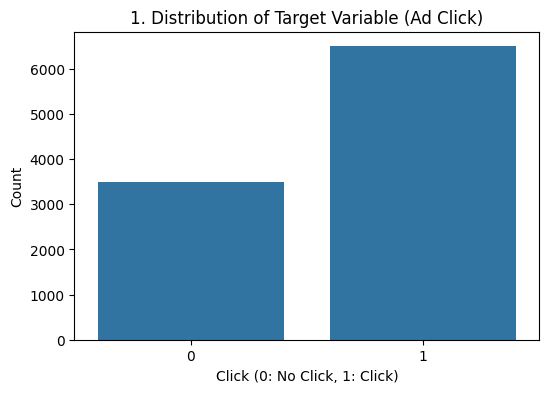

In [75]:
plt.figure(figsize=(6, 4))
sns.countplot(x='click', data=df)
plt.title('1. Distribution of Target Variable (Ad Click)')
plt.xlabel('Click (0: No Click, 1: Click)')
plt.ylabel('Count')
plt.show()


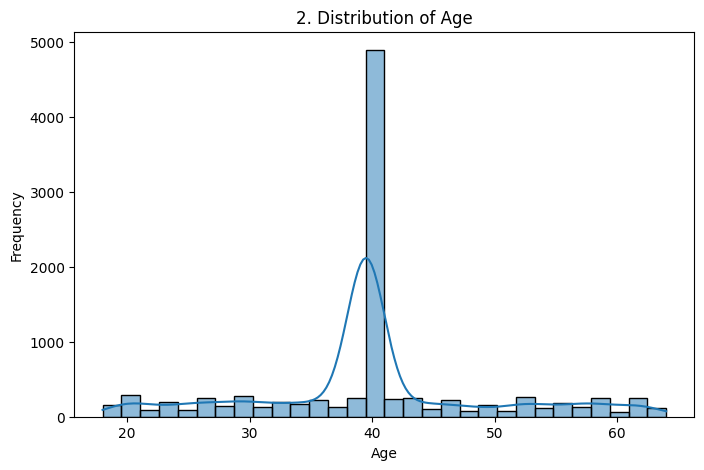

In [76]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('2. Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

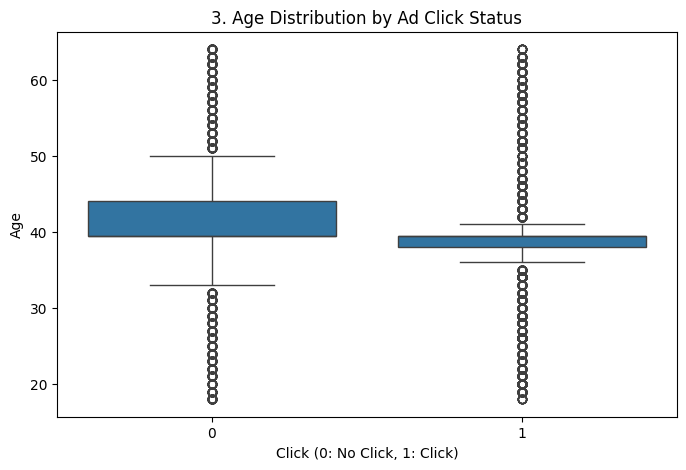

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='click', y='age', data=df)
plt.title('3. Age Distribution by Ad Click Status')
plt.xlabel('Click (0: No Click, 1: Click)')
plt.ylabel('Age')
plt.show()

In [78]:
df.columns

Index(['age', 'gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day', 'click'],
      dtype='object')

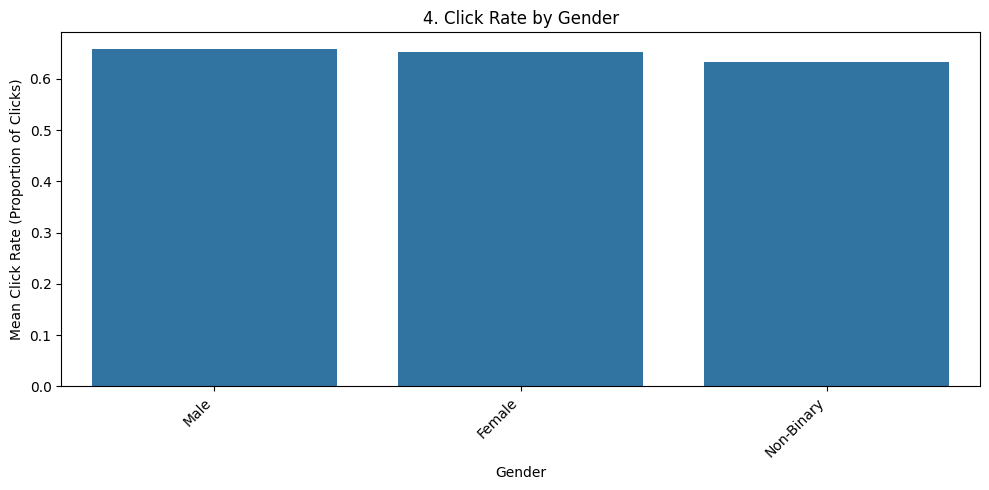

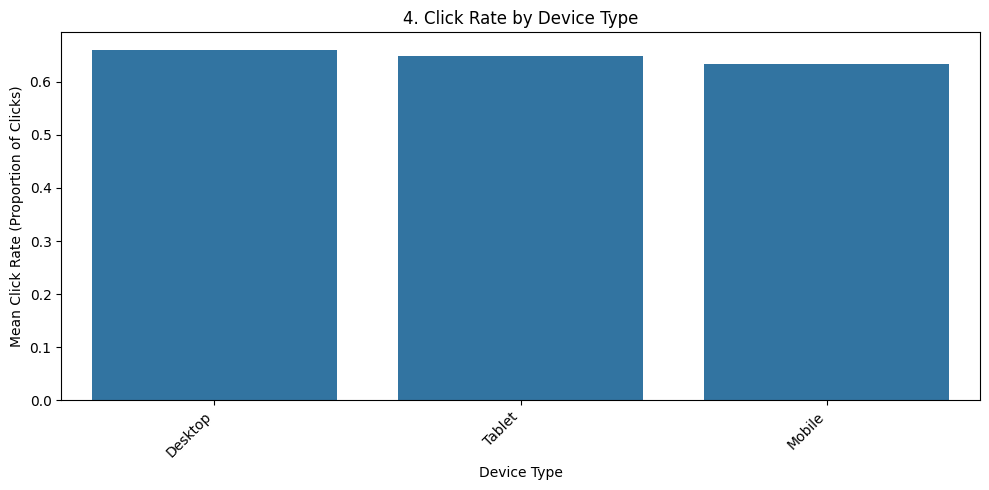

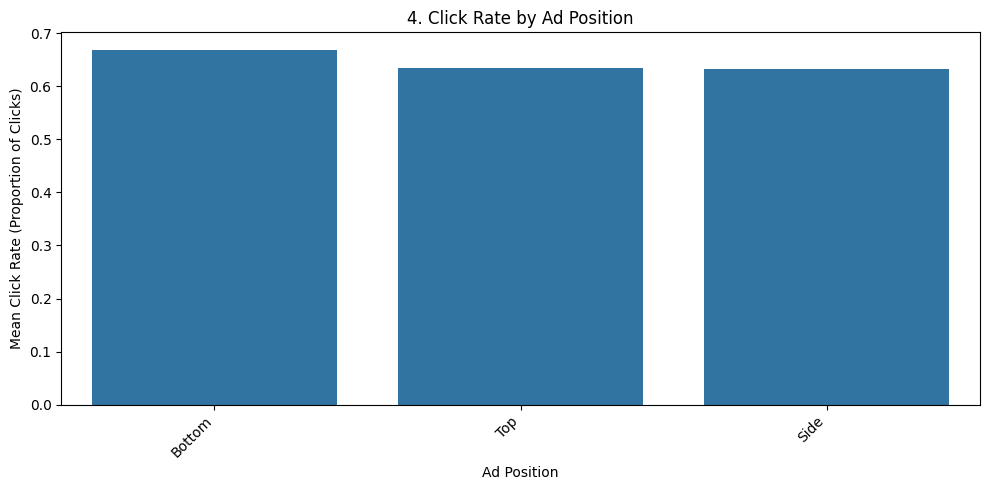

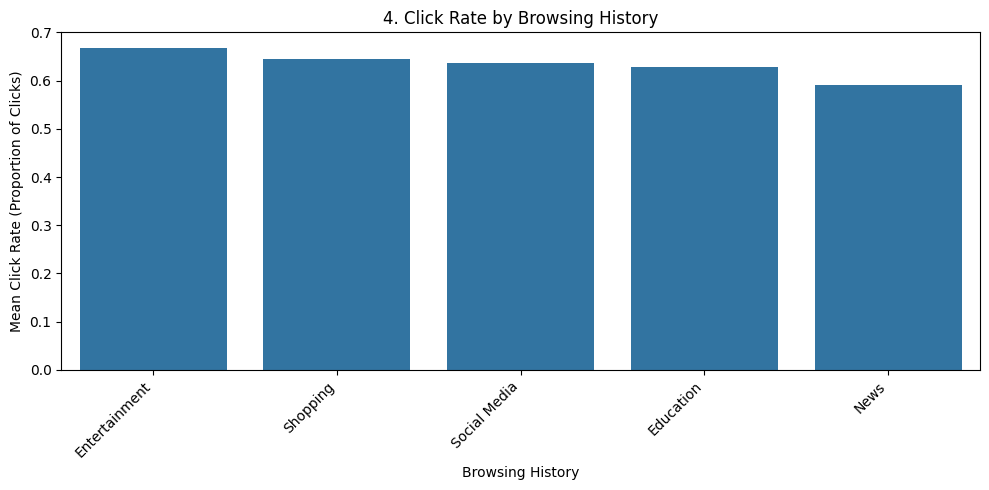

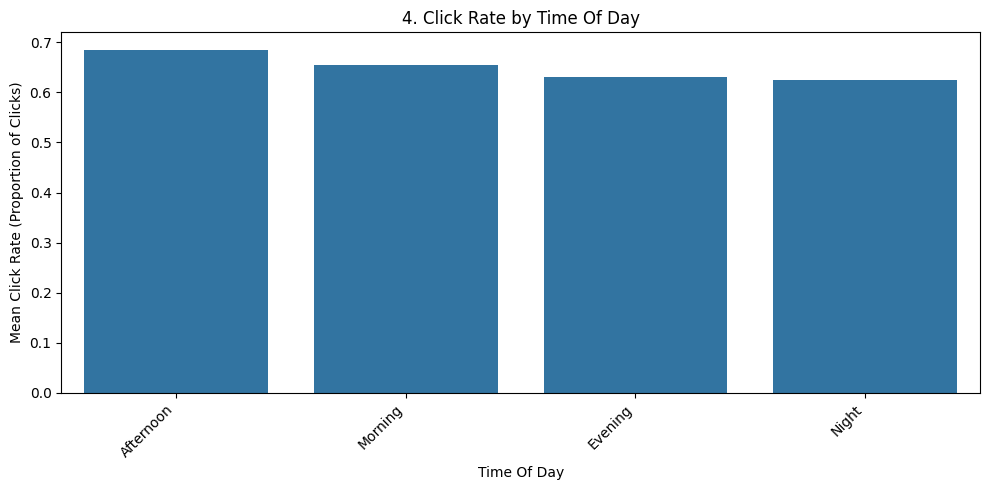

In [79]:
categorical_cols = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(10, 5))
    
    # Calculate the click rate (proportion of 1s) for each category
    click_rates = df.groupby(col)['click'].mean().sort_values(ascending=False)
    order = click_rates.index
    # Use a bar plot with hue to compare click counts, normalized by the category size
    sns.barplot(x=col, y='click', data=df, errorbar=None, order=order)
    
    plt.title(f'4. Click Rate by {col.replace("_", " ").title()}')
    plt.ylabel('Mean Click Rate (Proportion of Clicks)')
    plt.xlabel(col.replace("_", " ").title())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   gender            10000 non-null  object 
 2   device_type       10000 non-null  object 
 3   ad_position       10000 non-null  object 
 4   browsing_history  10000 non-null  object 
 5   time_of_day       10000 non-null  object 
 6   click             10000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [81]:
df.head()

,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,22.0,Female,Desktop,Top,Shopping,Afternoon,1
1,39.5,Male,Desktop,Top,Entertainment,Morning,1
2,41.0,Non-Binary,Desktop,Side,Education,Night,1
3,34.0,Male,Desktop,Bottom,Entertainment,Evening,1
4,39.0,Non-Binary,Desktop,Bottom,Social Media,Morning,0


In [82]:
# categorical columns
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

In [56]:
categorical_cols

['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
for i in categorical_cols:
    encoded_features = encoder.fit_transform(df[[i]])
    enoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out([i]))
    encoded_df = pd.concat([df, enoded_df], axis=1)
    df = encoded_df.drop(columns=i)



In [88]:
df

,age,click,gender_Female,gender_Male,gender_Non-Binary,device_type_Desktop,device_type_Mobile,device_type_Tablet,ad_position_Bottom,ad_position_Side,ad_position_Top,browsing_history_Education,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,22.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,39.5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,34.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,39.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,39.5,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,39.5,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,39.5,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


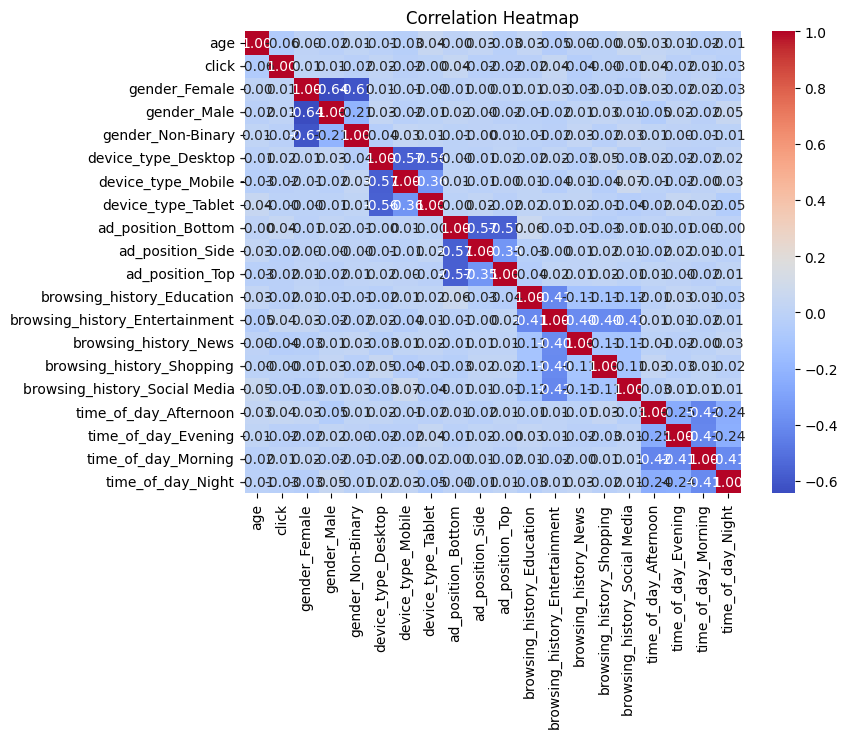

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [90]:
y=df['click']
X=df.drop('click',axis=1)

In [91]:
y

0       1
1       1
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: click, Length: 10000, dtype: int64

In [92]:
X

,age,gender_Female,gender_Male,gender_Non-Binary,device_type_Desktop,device_type_Mobile,device_type_Tablet,ad_position_Bottom,ad_position_Side,ad_position_Top,browsing_history_Education,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,22.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,39.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,34.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,39.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,39.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,39.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,39.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 19), (2000, 19), (8000,), (2000,))

In [96]:
X_train

,age,gender_Female,gender_Male,gender_Non-Binary,device_type_Desktop,device_type_Mobile,device_type_Tablet,ad_position_Bottom,ad_position_Side,ad_position_Top,browsing_history_Education,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
7529,39.5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3527,39.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9113,51.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6157,36.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8297,50.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,39.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1334,25.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8317,24.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4162,59.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
y

0       1
1       1
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: click, Length: 10000, dtype: int64

In [98]:
# use standard scaler for feature scaling
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()

In [100]:
X_train['age']=scaler.fit_transform(X_train[['age']])
X_test['age']=scaler.transform(X_test[['age']])

In [103]:
import pickle

with open('ag_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("StandardScaler object successfully saved")



StandardScaler object successfully saved


In [101]:
X_train

,age,gender_Female,gender_Male,gender_Non-Binary,device_type_Desktop,device_type_Mobile,device_type_Tablet,ad_position_Bottom,ad_position_Side,ad_position_Top,browsing_history_Education,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
7529,-0.039340,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3527,-0.039340,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9113,1.161893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6157,-0.404933,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8297,1.057438,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,-0.039340,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1334,-1.553939,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8317,-1.658394,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4162,1.997534,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model Training

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

In [119]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

In [121]:
results = {}

In [122]:
print("\n--- Model Training and Evaluation ---")
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate Classification Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"  {name} Metrics:")
    print(f"    Accuracy: {accuracy:.4f}")
    print(f"    F1-Score: {f1:.4f}")


--- Model Training and Evaluation ---
Training Logistic Regression...
  Logistic Regression Metrics:
    Accuracy: 0.6505
    F1-Score: 0.7881
Training Decision Tree...
  Decision Tree Metrics:
    Accuracy: 0.7320
    F1-Score: 0.8094
Training Random Forest...
  Random Forest Metrics:
    Accuracy: 0.7205
    F1-Score: 0.8060


In [124]:
# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(results).T
print("\n--- Full Performance Metrics ---")
print(results_df.round(4).to_markdown(numalign="left", stralign="left"))


--- Full Performance Metrics ---
|                     | Accuracy   | Precision   | Recall   | F1-Score   |
|:--------------------|:-----------|:------------|:---------|:-----------|
| Logistic Regression | 0.6505     | 0.6503      | 1        | 0.7881     |
| Decision Tree       | 0.732      | 0.7526      | 0.8754   | 0.8094     |
| Random Forest       | 0.7205     | 0.7343      | 0.8931   | 0.806      |



--- Best Model Selection ---
The best model based on F1-Score is: Decision Tree


C:\Users\HP\AppData\Local\Temp\ipykernel_23312\991983250.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['F1-Score'], palette="viridis")


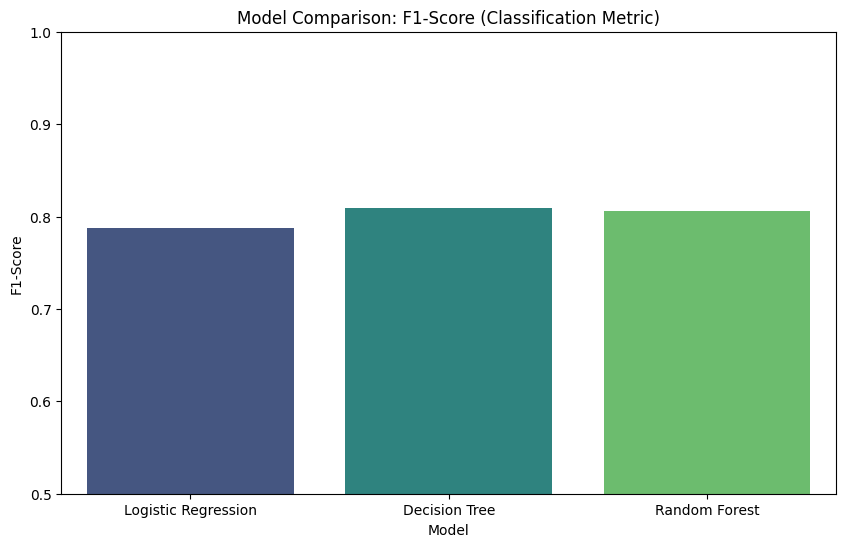


Model comparison plot displayed.

--- Best Model Selection ---
The best model based on F1-Score is: Decision Tree


C:\Users\HP\AppData\Local\Temp\ipykernel_23312\991983250.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['F1-Score'], palette="viridis")


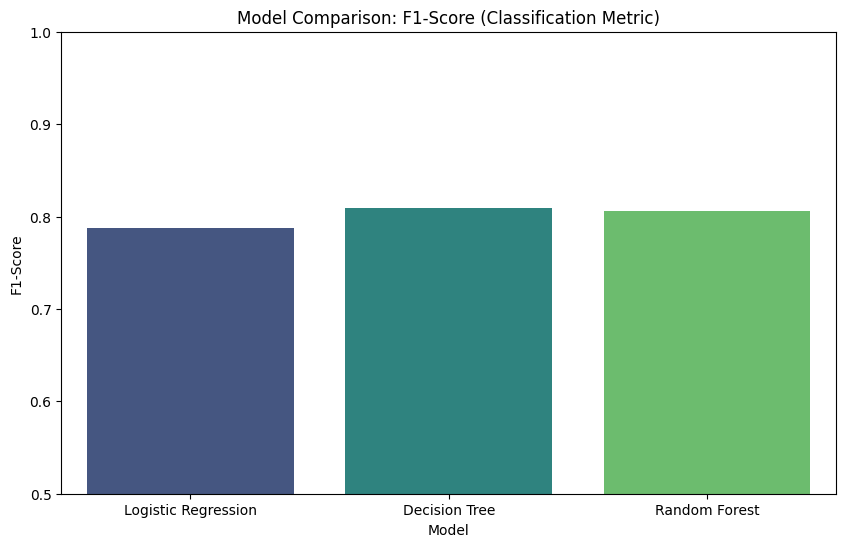


Model comparison plot displayed.


In [125]:

# Select the best model based on F1-Score
best_model_name = results_df['F1-Score'].idxmax()
print(f"\n--- Best Model Selection ---")
print(f"The best model based on F1-Score is: {best_model_name}")

# Plotting the F1-Scores for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['F1-Score'], palette="viridis")
plt.title('Model Comparison: F1-Score (Classification Metric)')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0.5, 1.0) # Set reasonable limits for F1 score
plt.show()

print("\nModel comparison plot displayed.")
# Select the best model based on F1-Score
best_model_name = results_df['F1-Score'].idxmax()
print(f"\n--- Best Model Selection ---")
print(f"The best model based on F1-Score is: {best_model_name}")

# Plotting the F1-Scores for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['F1-Score'], palette="viridis")
plt.title('Model Comparison: F1-Score (Classification Metric)')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0.5, 1.0) # Set reasonable limits for F1 score
plt.show()

print("\nModel comparison plot displayed.")